<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Analisi di serie temporali**:

Per aiutarti negli esercizi che seguiranno, ricorda:

**Stagionalità**: tendenza di una variabile a ripetere periodicamente il proprio comportamento si chiama stagionalità.

La stagionalità (annuale) è semplice con l'energia solare: ogni anno osserviamo lo stesso comportamento, dovuto alla disponibilità di luce solare.

La stagionalità non è necessariamente meterologica: pensate ai saldi durante le festività natalizie.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Utilizzando il dataset denominato *OPSD_Germany_all*, svolgi i seguenti esercizi:

- Esercizio 1

    Usa gli strumenti che abbiamo visto finora per tracciare il consumo di energia elettrica.

    Che tipo di **stagionalità** possiamo osservare su questa variabile? Come può essere interpretato?
    

- Esercizio 2

    Analizza la stagionalità settimanale del consumo di energia elettrica utilizzando le funzioni groupby (Pandas) ed eventualmente aiutati creando boxplot con Seaborn.
    

- Esercizio 3

    Confronta (all'interno di un singolo grafico) la serie mensile (di un anno a scelta) di:
    - consumo di energia elettrica 
    - produzione di energia rinnovabile (solare, eolica e la somma delle due).
   
    Tracciare la serie annuale del rapporto tra
    - produzione di energia rinnovabile
    - consumo di energia elettrica
    

- Esercizio 4 [facoltativo]

    Il resampling e il rolling nelle serie temporali sono due modi per implementare medie incrementali nel tempo. 

Traccia la produzione settimanale di energia solare durante il 2017/01-07 utilizzando resample e rolling. Confronta i risultati grafici.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('OPSD_Germany_all.csv')
df.head()
df['Date'] = pd.to_datetime(df['Date']) 
df.set_index('Date', inplace=True)

Esercizio 1)

<AxesSubplot: title={'center': 'Renawable energy production (GWh)'}, xlabel='Date'>

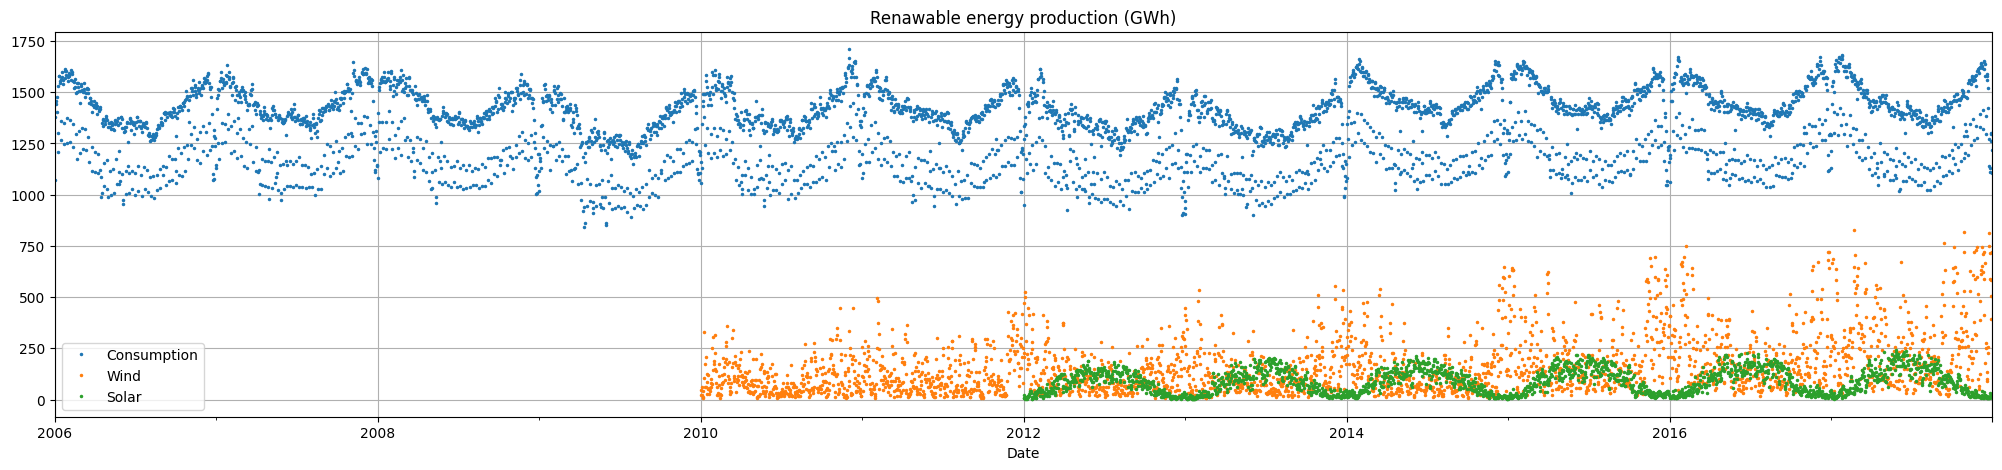

In [2]:
df.plot(figsize=(25, 5),
        title='Renawable energy production (GWh)',
        marker='.',
        markersize=3,
        linestyle='',
        grid=True)

Osserviamo un consumo energetico che ha un tipo di stagionalità annuale

Esercizio 2)

Per analizzare la stagionalità settimanale effettuiamo con pandas resample

<AxesSubplot: title={'center': 'Energy consumption'}, xlabel='Date'>

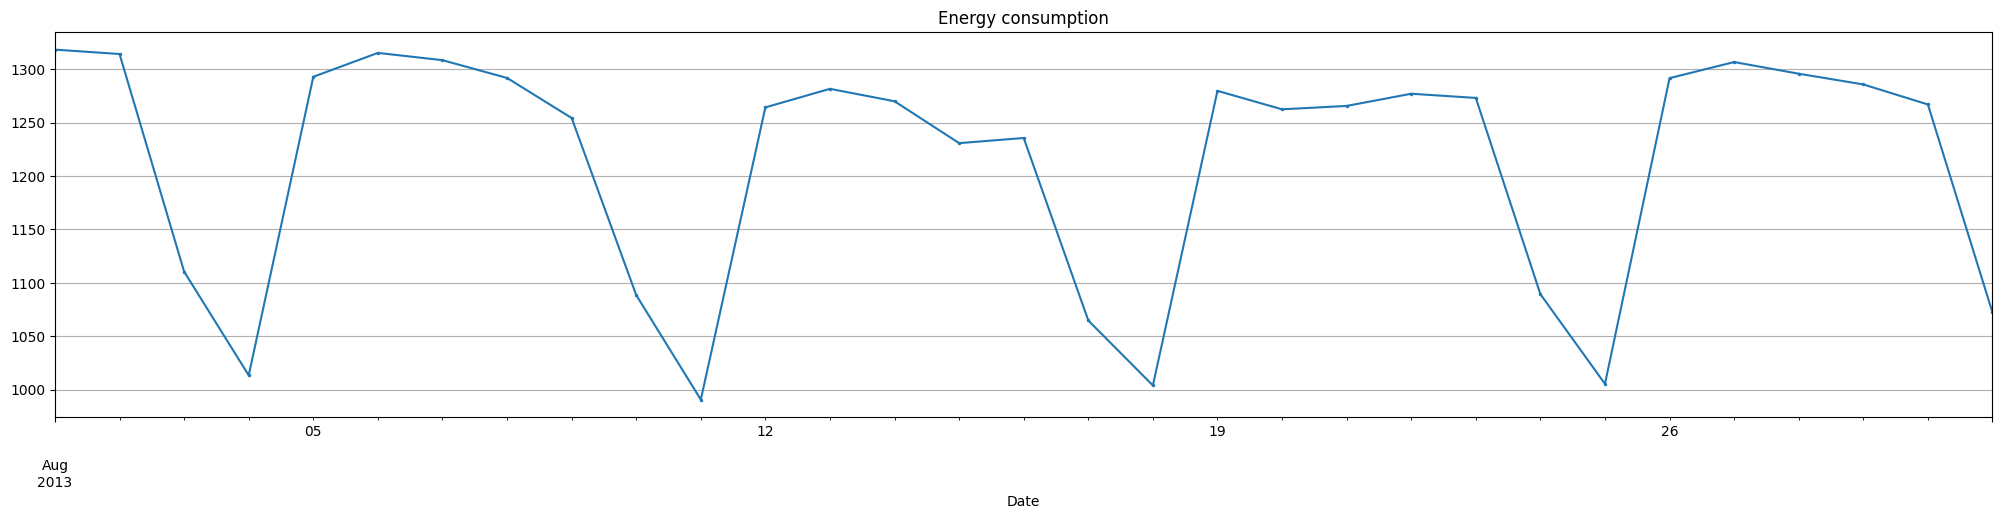

In [3]:
df['Consumption']['2013-08'].plot(figsize=(25, 5),
                            title='Energy consumption',
                            marker='.',
                            markersize=3,
                            linestyle='-',
                            grid=True)

In [4]:
df['weekday'] = df.index.day_name()
df_weekday = df.groupby('weekday').mean().reset_index()

<AxesSubplot: title={'center': 'Energy consumption'}>

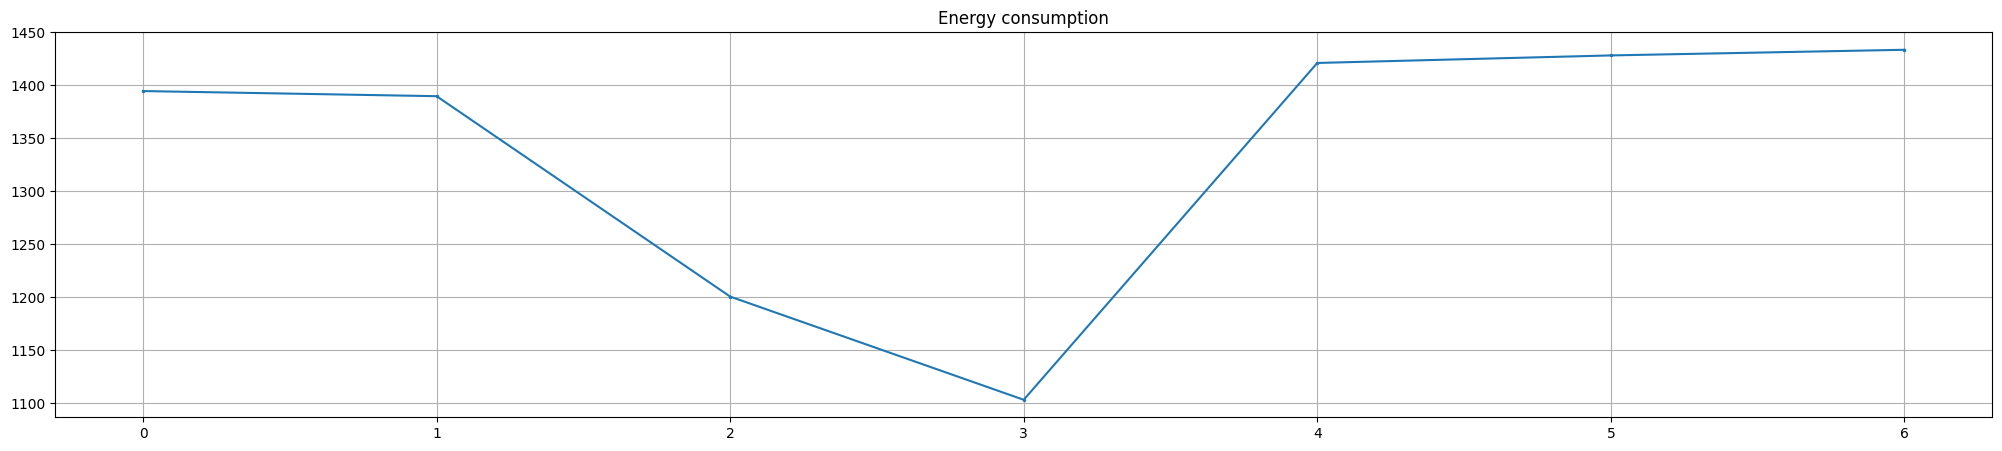

In [5]:
df_weekday['Consumption'].plot(figsize=(25, 5),
                title='Energy consumption',
                marker='.',
                markersize=3,
                linestyle='-',
                grid=True)

In [6]:
df_weekday

,weekday,Consumption,Wind,Solar
0,Friday,1394.624076,160.754522,89.571278
1,Monday,1389.786334,160.987213,90.131751
2,Saturday,1200.549839,169.197474,87.976280
3,Sunday,1103.104493,172.033400,88.663385
4,Thursday,1421.158254,165.235141,91.149128
5,Tuesday,1428.277624,160.016420,88.045792
6,Wednesday,1433.606541,165.460048,89.263153


<AxesSubplot: xlabel='weekday', ylabel='Consumption'>

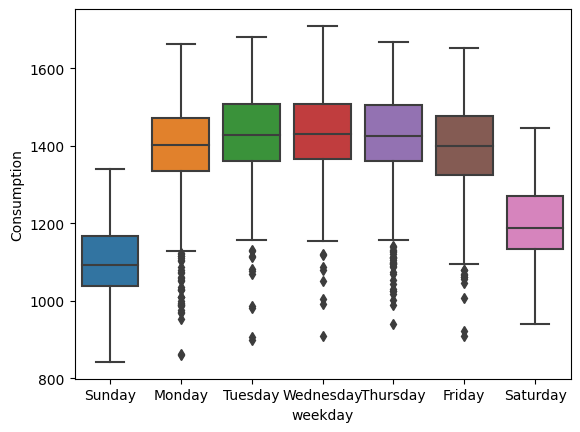

In [7]:
sns.boxplot(df, x='weekday', y='Consumption')

Esercizio 3)

    Confronta (all'interno di un singolo grafico) la serie mensile (di un anno a scelta) di:
    - consumo di energia elettrica 
    - produzione di energia rinnovabile (solare, eolica e la somma delle due).
   
    Tracciare la serie annuale del rapporto tra
    - produzione di energia rinnovabile
    - consumo di energia elettrica

<AxesSubplot: title={'center': 'Solar + Wind'}, xlabel='Date'>

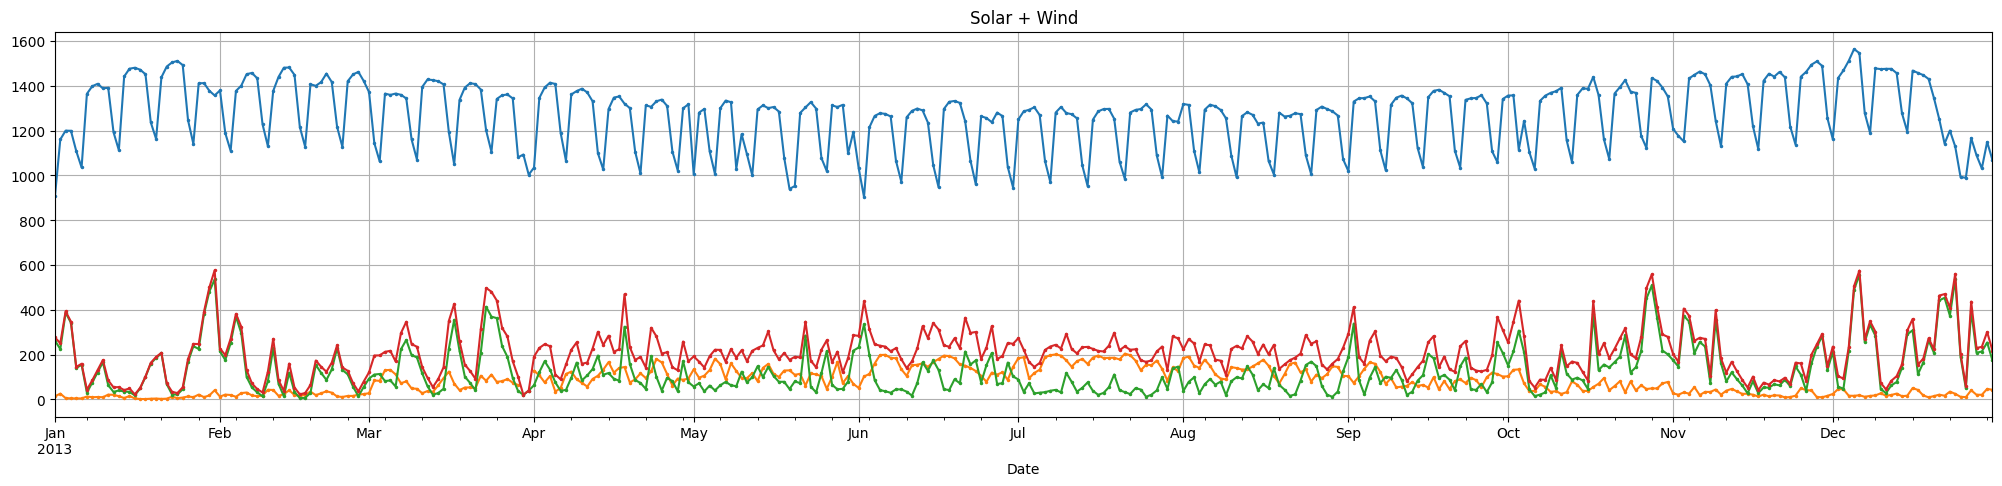

In [8]:
df['Consumption']['2013'].plot(figsize=(25, 5),
                                title='Energy consumption',
                                marker='.',
                                markersize=3,
                                linestyle='-',
                                grid=True)

df['Solar']['2013'].plot(figsize=(25, 5),
                                title='Solar',
                                marker='.',
                                markersize=3,
                                linestyle='-',
                                grid=True)
df['Wind']['2013'].plot(figsize=(25, 5),
                                title='Wind',
                                marker='.',
                                markersize=3,
                                linestyle='-',
                                grid=True)
renewable_month = df['Wind']['2013'].fillna(0) + df['Solar']['2013'].fillna(0)
renewable_month.plot(figsize=(25, 5),
                title='Solar + Wind',
                marker='.',
                markersize=3,
                linestyle='-',
                grid=True)

<AxesSubplot: title={'center': 'Renewable-rate-day'}, xlabel='Date'>

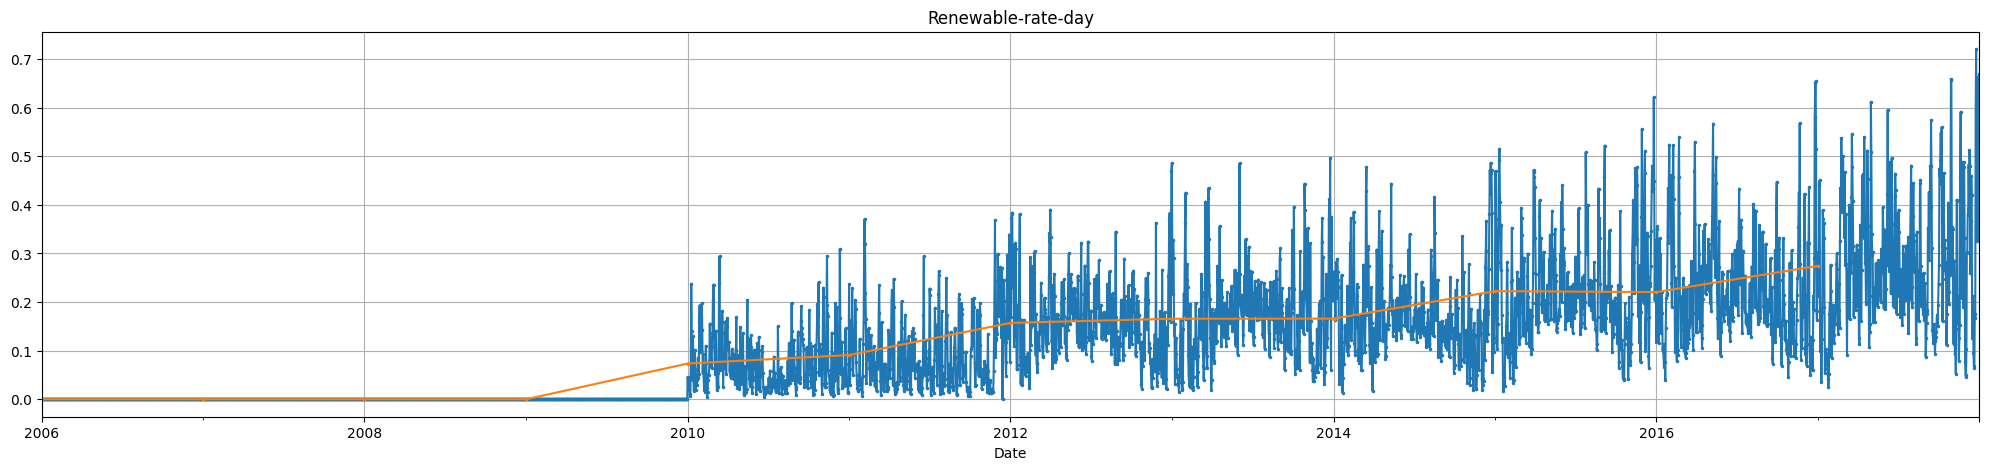

In [16]:
renewable_day = df['Wind'].fillna(0) + df['Solar'].fillna(0)
renewable_rate = renewable_day / df['Consumption']
renewable_rate.plot(figsize=(25, 5),
                title='Renewable-rate-day',
                marker='.',
                markersize=3,
                linestyle='-',
                grid=True)

renewable_year = df['Wind'].fillna(0).resample('Y', label='right').mean() + df['Solar'].fillna(0).resample('Y', label='right').mean()
renewable_rate = renewable_year / df['Consumption'].resample('Y', label='right').mean()
renewable_rate.plot(figsize=(25, 5),
                title='Renewable-rate-day',
                marker='.',
                markersize=3,
                linestyle='-',
                grid=True)

Esercizio 4)

    Traccia la produzione settimanale di energia solare durante il 2017/01-07 utilizzando resample e rolling. Confronta i risultati grafici.

<AxesSubplot: title={'center': 'Renewable-rate-day'}, xlabel='Date'>

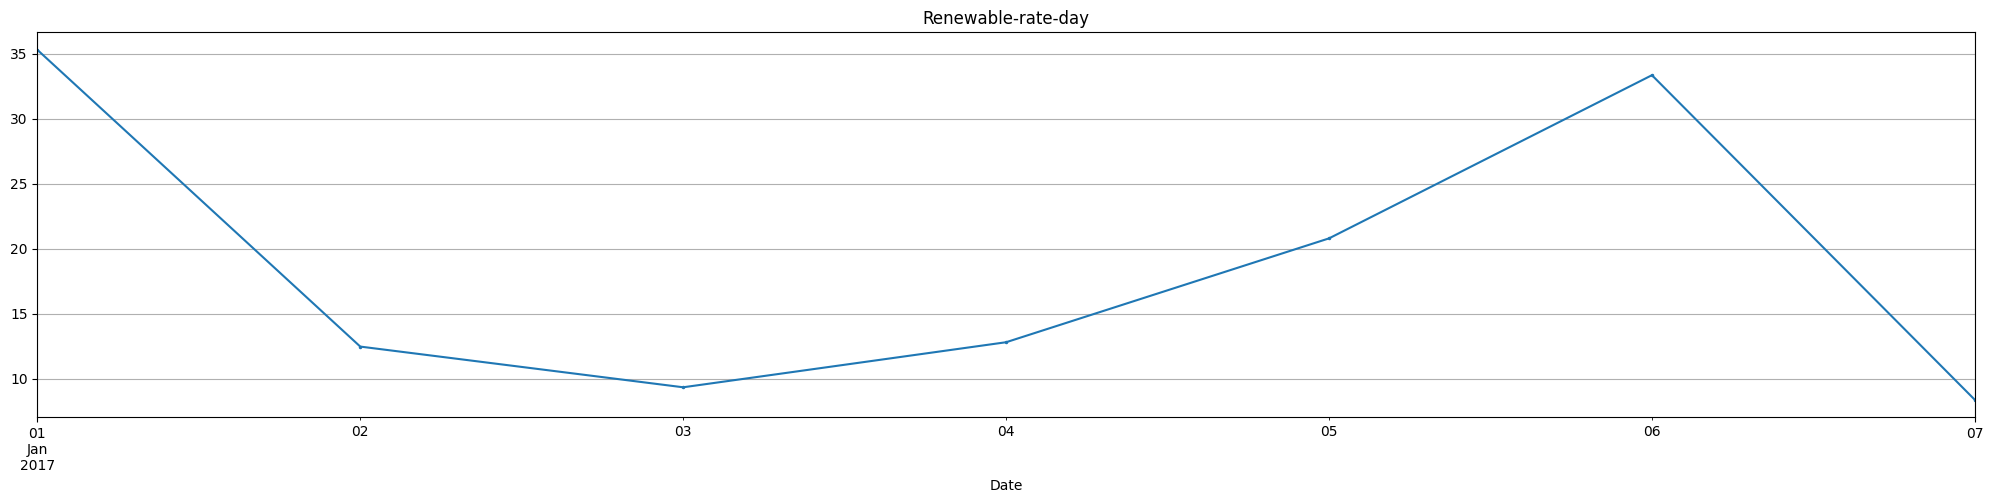

In [7]:
df['Solar']['2017-01-01':'2017-01-07'].plot(figsize=(25, 5),
                                            title='Renewable-rate-day',
                                            marker='.',
                                            markersize=3,
                                            linestyle='-',
                                            grid=True)

In [23]:
df['Solar']['2017-01-01':'2017-01-07'].resample('W-SAT').mean()

Date
2017-01-07    18.922857
Freq: W-SAT, Name: Solar, dtype: float64

In [21]:
df['Solar']['2017-01-01':'2017-01-07']

Date
2017-01-01    35.291
2017-01-02    12.479
2017-01-03     9.351
2017-01-04    12.814
2017-01-05    20.797
2017-01-06    33.341
2017-01-07     8.387
Name: Solar, dtype: float64

In [6]:
df['Solar']['2017-01-01':'2017-01-07'].mean()

18.922857142857143

In [22]:
df['Solar']['2017-01-01':'2017-01-07'].index.day_name()

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'],
      dtype='object', name='Date')

In [28]:
import pandas as pd

# Creazione di un DataFrame di esempio
df = pd.DataFrame({'Timestamp': pd.date_range(start='2017-01-01', end='2017-01-06'),
                   'Solar': [10, 15, 12, 8, 9, 11]})

# Impostazione della colonna 'Timestamp' come indice
df.set_index('Timestamp', inplace=True)

# Calcolo della media settimanale utilizzando l'etichetta 'left'
weekly_mean = df.resample('W', label='right').mean()

print(weekly_mean)

            Solar
Timestamp        
2017-01-01   10.0
2017-01-08   11.0
